# The Robert and Rosenbaum Uncertainty Zones model

# An application to EURUSD FX Futures at CME

## Implementation by
## Marcos Costa Santos Carreira (École Polytechnique - CMAP)
## and
## Florian Huchedé (CME)
## Aug-2019

## Import packages

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import glob

In [421]:
pd.set_option('display.max_columns', 50)

In [422]:
pd.set_option('display.max_rows', 200)

In [423]:
import cme_processing as cme

## File paths and initial values

In [424]:
PATHPROJ = '/Users/marcoscscarreira/Documents/X/CME project/CME_data/'
URL_ROOT = 'https://raw.githubusercontent.com/MarcosCarreira/UZStats/master/CME_data/'

In [425]:
CURR = 'CAD'

In [426]:
PATH_PRIOR = PATHPROJ+CURR+'/prior/'
PATH_AFTER = PATHPROJ+CURR+'/after/'
URL_1 = CURR+'/prior/'
URL_2 = CURR+'/after/'
#PATH_PRIOR = URL_ROOT+URL_1
#PATH_AFTER = URL_ROOT+URL_2

In [427]:
TRADING_HOURS = 8

In [428]:
TICK_PRIOR = 1.0
TICK_AFTER = 0.5

In [429]:
PRIOR_CDATES_LIST = [['6CH6', '010416'], ['6CH6', '010516'], ['6CH6', '010616'],\
    ['6CH6', '010716'], ['6CH6', '010816'], ['6CH6', '011116'], ['6CH6', '011216'],\
    ['6CH6', '011316'], ['6CH6', '011416'], ['6CH6', '011516'], ['6CH6', '011816'],\
    ['6CH6', '011916'], ['6CH6', '012016'], ['6CH6', '012116'], ['6CH6', '012216'],\
    ['6CH6', '012516'], ['6CH6', '012616'], ['6CH6', '012716'], ['6CH6', '012816'],\
    ['6CH6', '012916'], ['6CH6', '20160201'], ['6CH6', '20160202'], ['6CH6', '20160203'],\
    ['6CH6', '20160204'], ['6CH6', '20160205'], ['6CH6', '20160208'], ['6CH6', '20160209'],\
    ['6CH6', '20160210'], ['6CH6', '20160211'], ['6CH6', '20160212'], ['6CH6', '20160215'],\
    ['6CH6', '20160216'], ['6CH6', '20160217'], ['6CH6', '20160218'], ['6CH6', '20160219'],\
    ['6CH6', '20160222'], ['6CH6', '20160223'], ['6CH6', '20160224'], ['6CH6', '20160225'],\
    ['6CH6', '20160226'], ['6CH6', '20160229'], ['6CH6', '20160301'], ['6CH6', '20160302'],\
    ['6CH6', '20160303'], ['6CH6', '20160304'], ['6CH6', '20160307'], ['6CH6', '20160308'],\
    ['6CH6', '20160309'], ['6CH6', '20160310'], ['6CH6', '20160311'], ['6CM6', '20160314'],\
    ['6CM6', '20160315'], ['6CM6', '20160316'], ['6CM6', '20160317'], ['6CM6', '20160318'],\
    ['6CM6', '20160321'], ['6CM6', '20160322'], ['6CM6', '20160323'], ['6CM6', '20160324'],\
    ['6CM6', '20160328'], ['6CM6', '20160329'], ['6CM6', '20160330'], ['6CM6', '20160331'],\
    ['6CM6', '20160401'], ['6CM6', '20160404'], ['6CM6', '20160405'], ['6CM6', '20160406'],\
    ['6CM6', '20160407'], ['6CM6', '20160408'], ['6CM6', '20160411'], ['6CM6', '20160412'],\
    ['6CM6', '20160413'], ['6CM6', '20160414'], ['6CM6', '20160415'], ['6CM6', '20160418'],\
    ['6CM6', '20160419'], ['6CM6', '20160420'], ['6CM6', '20160421'], ['6CM6', '20160422'],\
    ['6CM6', '20160425'], ['6CM6', '20160426'], ['6CM6', '20160427'], ['6CM6', '20160428'],\
    ['6CM6', '20160429'], ['6CM6', '20160502'], ['6CM6', '20160503'], ['6CM6', '20160504'],\
    ['6CM6', '20160505'], ['6CM6', '20160506'], ['6CM6', '20160509'], ['6CM6', '20160510'],\
    ['6CM6', '20160511'], ['6CM6', '20160512'], ['6CM6', '20160513'], ['6CM6', '20160516'],\
    ['6CM6', '20160517'], ['6CM6', '20160518'], ['6CM6', '20160519'], ['6CM6', '20160520'],\
    ['6CM6', '20160523'], ['6CM6', '20160524'], ['6CM6', '20160525'], ['6CM6', '20160526'],\
    ['6CM6', '20160527'], ['6CM6', '20160530'], ['6CM6', '20160531'], ['6CM6', '20160601'],\
    ['6CM6', '20160602'], ['6CM6', '20160603'], ['6CM6', '20160606'], ['6CM6', '20160607'],\
    ['6CM6', '20160608'], ['6CM6', '20160609'], ['6CU6', '061016'], ['6CU6', '061316'],\
    ['6CU6', '061416'], ['6CU6', '061516'], ['6CU6', '061616'], ['6CU6', '061716'],\
    ['6CU6', '062016'], ['6CU6', '062116'], ['6CU6', '062216'], ['6CU6', '062316'],\
    ['6CU6', '062416'], ['6CU6', '062716'], ['6CU6', '062816'], ['6CU6', '062916'],\
    ['6CU6', '063016'], ['6CU6', '070116'], ['6CU6', '070416'], ['6CU6', '070516'],\
    ['6CU6', '070616'], ['6CU6', '070716'], ['6CU6', '070816']]

In [430]:
AFTER_CDATES_LIST = [['6CU6', '071116'], ['6CU6', '071216'], ['6CU6', '071316'],\
    ['6CU6', '071416'], ['6CU6', '071516'], ['6CU6', '071816'], ['6CU6', '071916'],\
    ['6CU6', '072016'], ['6CU6', '072116'], ['6CU6', '072216'], ['6CU6', '072516'],\
    ['6CU6', '072616'], ['6CU6', '072716'], ['6CU6', '072816'], ['6CU6', '072916'],\
    ['6CU6', '080116'], ['6CU6', '080216'], ['6CU6', '080316'], ['6CU6', '080416'],\
    ['6CU6', '080516'], ['6CU6', '080816'], ['6CU6', '080916'], ['6CU6', '081016'],\
    ['6CU6', '081116'], ['6CU6', '081216'], ['6CU6', '081516'], ['6CU6', '081616'],\
    ['6CU6', '081716'], ['6CU6', '081816'], ['6CU6', '081916'], ['6CU6', '082216'],\
    ['6CU6', '082316'], ['6CU6', '082416'], ['6CU6', '082516'], ['6CU6', '082616'],\
    ['6CU6', '082916'], ['6CU6', '083016'], ['6CU6', '083116'], ['6CU6', '090116'],\
    ['6CU6', '090216'], ['6CU6', '090516'], ['6CU6', '090616'], ['6CU6', '090716'],\
    ['6CU6', '090816'], ['6CU6', '090916'], ['6CU6', '091216'], ['6CU6', '091316'],\
    ['6CU6', '091416'], ['6CU6', '091516'], ['6CZ6', '20160916'], ['6CZ6', '20160919'],\
    ['6CZ6', '20160920'], ['6CZ6', '20160921'], ['6CZ6', '20160922'], ['6CZ6', '20160923'],\
    ['6CZ6', '20160926'], ['6CZ6', '20160927'], ['6CZ6', '20160928'], ['6CZ6', '20160929'],\
    ['6CZ6', '20160930'], ['6CZ6', '20161003'], ['6CZ6', '20161004'], ['6CZ6', '20161005'],\
    ['6CZ6', '20161006'], ['6CZ6', '20161007'], ['6CZ6', '20161010'], ['6CZ6', '20161011'],\
    ['6CZ6', '20161012'], ['6CZ6', '20161013'], ['6CZ6', '20161014'], ['6CZ6', '20161017'],\
    ['6CZ6', '20161018'], ['6CZ6', '20161019'], ['6CZ6', '20161020'], ['6CZ6', '20161021'],\
    ['6CZ6', '20161024'], ['6CZ6', '20161025'], ['6CZ6', '20161026'], ['6CZ6', '20161027'],\
    ['6CZ6', '20161028'], ['6CZ6', '20161031'], ['6CZ6', '20161101'], ['6CZ6', '20161102'],\
    ['6CZ6', '20161103'], ['6CZ6', '20161104'], ['6CZ6', '20161107'], ['6CZ6', '20161108'],\
    ['6CZ6', '20161109'], ['6CZ6', '20161110'], ['6CZ6', '20161111'], ['6CZ6', '20161114'],\
    ['6CZ6', '20161115'], ['6CZ6', '20161116'], ['6CZ6', '20161117'], ['6CZ6', '20161118'],\
    ['6CZ6', '20161121'], ['6CZ6', '20161122'], ['6CZ6', '20161123'], ['6CZ6', '20161124'],\
    ['6CZ6', '20161125'], ['6CZ6', '20161128'], ['6CZ6', '20161129'], ['6CZ6', '20161130'],\
    ['6CZ6', '20161201'], ['6CZ6', '20161202'], ['6CZ6', '20161205'], ['6CZ6', '20161206'],\
    ['6CZ6', '20161207'], ['6CZ6', '20161208'], ['6CZ6', '20161209'], ['6CZ6', '20161212'],\
    ['6CZ6', '20161213'], ['6CZ6', '20161214'], ['6CZ6', '20161215'], ['6CZ6', '20161216'],\
    ['w6CH7', '20161219'], ['w6CH7', '20161220'], ['w6CH7', '20161221'], ['w6CH7', '20161222'],\
    ['w6CH7', '20161223'], ['w6CH7', '20161227'], ['w6CH7', '20161228'], ['w6CH7', '20161229'],\
    ['w6CH7', '20161230'], ['x6CH7', '010317'], ['x6CH7', '010417'], ['x6CH7', '010517'],\
    ['x6CH7', '010617'], ['x6CH7', '010917'], ['x6CH7', '011017'], ['x6CH7', '011117'],\
    ['x6CH7', '011217'], ['x6CH7', '011317'], ['x6CH7', '011617'], ['x6CH7', '011717'],\
    ['x6CH7', '011817'], ['x6CH7', '011917'], ['x6CH7', '012017'], ['x6CH7', '012317'],\
    ['x6CH7', '012417'], ['x6CH7', '012517'], ['x6CH7', '012617'], ['x6CH7', '012717'],\
    ['x6CH7', '013017']]

### Processing files

#### Prior

In [431]:
#PRIOR_CDATES_LIST = cme.list_files(PATH_PRIOR)

In [432]:
#PRIOR_CDATES_LIST

In [433]:
PRIOR_CDATES, FILES_PRIOR_CAticks, FILES_PRIOR_COSTtrades,\
    FILES_PRIOR_OBstats, FILES_PRIOR_OTtrans,\
    FILES_PRIOR_RDFtrans, FILES_PRIOR_UZstats = \
    cme.process_files(PATH_PRIOR, PRIOR_CDATES_LIST, 'prior', TICK_PRIOR)

In [434]:
PRIOR_OB_UZ_STATS = cme.ob_uz_stats(PRIOR_CDATES, FILES_PRIOR_OBstats,\
    FILES_PRIOR_UZstats, FILES_PRIOR_CAticks, TRADING_HOURS)

In [435]:
PRIOR_IMBAL_STATS = cme.imbal_stats(PRIOR_CDATES, FILES_PRIOR_OTtrans)

In [436]:
PRIOR_IMBAL_STATS_TS = cme.time_series_imbal(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [437]:
PRIOR_IMBAL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [438]:
PRIOR_TRADE_STATS_TS = cme.time_series_imbal_trd(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [439]:
PRIOR_DEPL_STATS = cme.depl_stats(PRIOR_CDATES, FILES_PRIOR_RDFtrans)

In [440]:
PRIOR_DEPL_STATS_TS = cme.time_series_depl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [441]:
PRIOR_DEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [442]:
PRIOR_ABSDEPL_STATS_TS = cme.time_series_absdepl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [443]:
PRIOR_ABSDEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values
PRIOR_ABSDEPL_STATS_TS['M'] = PRIOR_OB_UZ_STATS['M'].values

In [444]:
PRIOR_COST_STATS = cme.cost_stats(PRIOR_CDATES, FILES_PRIOR_COSTtrades)

In [445]:
PRIOR_COST_STATS['Status'] = 'prior'

#### After

In [446]:
#AFTER_CDATES_LIST = cme.list_files(PATH_AFTER)

In [447]:
#AFTER_CDATES_LIST

In [448]:
AFTER_CDATES, FILES_AFTER_CAticks, FILES_AFTER_COSTtrades,\
    FILES_AFTER_OBstats, FILES_AFTER_OTtrans,\
    FILES_AFTER_RDFtrans, FILES_AFTER_UZstats = \
    cme.process_files(PATH_AFTER, AFTER_CDATES_LIST, 'after', TICK_AFTER)

In [449]:
AFTER_OB_UZ_STATS = cme.ob_uz_stats(AFTER_CDATES, FILES_AFTER_OBstats,\
    FILES_AFTER_UZstats, FILES_AFTER_CAticks, TRADING_HOURS)

In [450]:
AFTER_IMBAL_STATS = cme.imbal_stats(AFTER_CDATES, FILES_AFTER_OTtrans)

In [451]:
AFTER_IMBAL_STATS_TS = cme.time_series_imbal(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [452]:
AFTER_IMBAL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [453]:
AFTER_TRADE_STATS_TS = cme.time_series_imbal_trd(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [454]:
AFTER_DEPL_STATS = cme.depl_stats(AFTER_CDATES, FILES_AFTER_RDFtrans)

In [455]:
AFTER_DEPL_STATS_TS = cme.time_series_depl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [456]:
AFTER_DEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [457]:
AFTER_ABSDEPL_STATS_TS = cme.time_series_absdepl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [458]:
AFTER_ABSDEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values
AFTER_ABSDEPL_STATS_TS['M'] = AFTER_OB_UZ_STATS['M'].values

In [459]:
AFTER_COST_STATS = cme.cost_stats(AFTER_CDATES, FILES_AFTER_COSTtrades)

In [460]:
AFTER_COST_STATS['Status'] = 'after'

#### Join prior and after

In [461]:
OB_UZ_STATS = pd.concat([PRIOR_OB_UZ_STATS, AFTER_OB_UZ_STATS], sort=False)

In [462]:
IMBAL_STATS_TS = pd.concat([PRIOR_IMBAL_STATS_TS, AFTER_IMBAL_STATS_TS], sort=False)

In [463]:
TRADE_STATS_TS = pd.concat([PRIOR_TRADE_STATS_TS, AFTER_TRADE_STATS_TS], sort=False)

In [464]:
DEPL_STATS_TS = pd.concat([PRIOR_DEPL_STATS_TS, AFTER_DEPL_STATS_TS], sort=False)

In [465]:
ABSDEPL_STATS_TS = pd.concat([PRIOR_ABSDEPL_STATS_TS, AFTER_ABSDEPL_STATS_TS], sort=False)

### Tables

In [466]:
TABLE_MATHIEU = cme.table_mathieu(OB_UZ_STATS)
TABLE_MATHIEU_ERR = cme.table_mathieu_err(OB_UZ_STATS)

In [467]:
TABLE_MATHIEU

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,1.0,1.02277,2438.51840,2185.92537,13803.09701,47213.98507,0.34475,0.98419,0.98195,1.1588,14.23491,14.68797,0.00534,7537.40442
after,0.5,0.53664,5942.51167,4167.02083,15321.84028,42244.48611,0.38756,0.91061,0.94132,1.4512,6.66623,8.01438,0.00428,7577.81324


In [468]:
TABLE_MATHIEU_ERR

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,0.0,0.02993,1044.90182,727.89507,4509.27540,16095.24557,0.03674,0.00841,0.01942,0.29678,8.64882,5.98536,0.00122,292.71547
after,0.0,0.02957,4030.54127,1573.27168,5541.41443,13972.79885,0.04048,0.05451,0.03624,0.46617,4.22656,3.80094,0.00128,104.14234


In [469]:
cme.avg_perc_mat(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,0.03,1.24,0.25,0.06,0.00,1.58
Imbal_Bid,0.65,26.58,1.71,0.20,0.28,29.41
Neutral,0.62,1.33,34.42,1.33,0.63,38.34
Imbal_Ask,0.28,0.19,1.70,26.26,0.65,29.08
Trade_Ask,0.00,0.06,0.26,1.24,0.03,1.59
Total Rows,1.58,29.41,38.34,29.08,1.59,100.00


In [470]:
cme.avg_perc_mat(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,0.04,1.18,0.50,0.14,0.00,1.87
Imbal_Bid,0.59,22.53,2.64,0.86,0.55,27.17
Neutral,0.67,2.47,35.89,2.48,0.68,42.19
Imbal_Ask,0.55,0.85,2.65,22.26,0.59,26.91
Trade_Ask,0.00,0.14,0.51,1.18,0.04,1.86
Total Rows,1.87,27.17,42.19,26.91,1.86,100.00


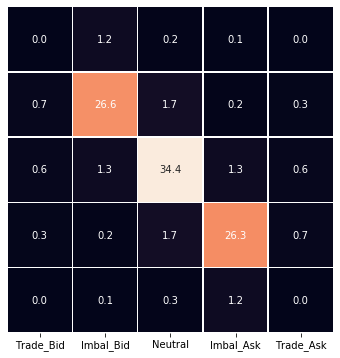

In [471]:
AVG_IMBAL_PRIOR = cme.avg_perc_mat(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))
plt.figure(figsize=(9, 6))
sns.heatmap(AVG_IMBAL_PRIOR.iloc[:-1].drop(columns=['Total Cols']),\
    annot=True, fmt=".1f",\
    linewidths=.5, square=True,\
    xticklabels=True,\
    yticklabels=False,\
    cbar=False);

In [472]:
cme.avg_perc_mat_2(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

same                     oppo                    Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F   F             
 D C         0.01  0.01  0.06  22.02  0.01   0.01  0.97  0.84      23.92
 D T         0.01  0.05  0.34  17.78  0.01   0.01  1.95  4.04      24.18
D T+F        0.01  0.01  0.11   2.62  0.01   0.01  0.44  0.66       3.86
  F         16.63  9.73  0.00   0.03  7.23  14.35  0.00  0.05      48.04
Total Rows  16.66  9.80  0.51  42.45  7.26  14.38  3.35  5.59     100.00

In [473]:
cme.avg_perc_mat_2(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

same                     oppo                     Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F    F             
 D C         0.04  0.07  0.09  21.94  0.07   0.04  0.46   3.23      25.94
 D T         0.06  0.26  0.31  14.16  0.14   0.13  1.53   6.30      22.89
D T+F        0.04  0.06  0.10   1.39  0.07   0.06  0.16   0.77       2.66
  F         19.08  9.54  0.01   0.30  6.43  12.73  0.00   0.42      48.51
Total Rows  19.23  9.93  0.50  37.79  6.71  12.96  2.16  10.72     100.00

## Charts and Regressions

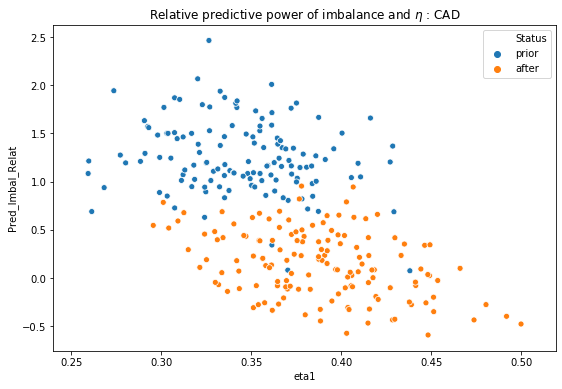

In [474]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Pred_Imbal_Relat', hue='Status',\
           data=IMBAL_STATS_TS);
plt.title('Relative predictive power of imbalance and $\eta$ : '+CURR);

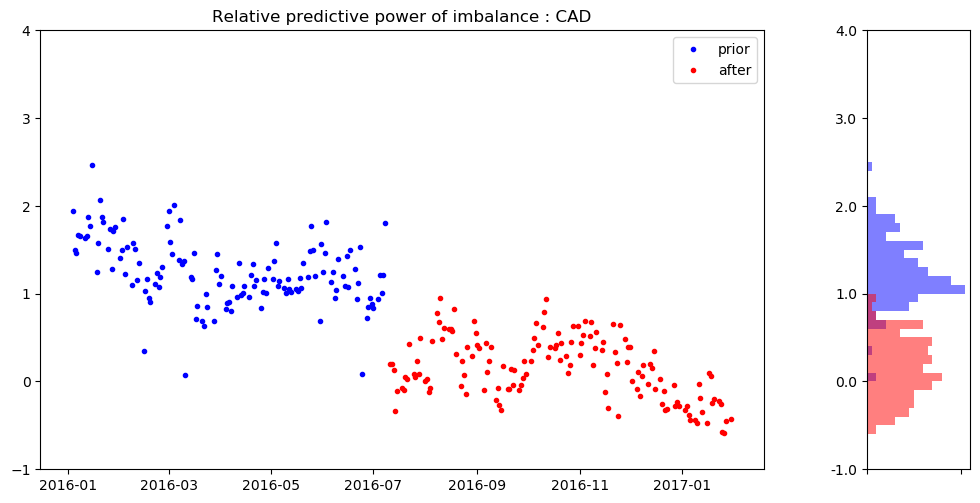

In [475]:
cme.time_series_hist_plot(IMBAL_STATS_TS, 'Pred_Imbal_Relat',\
    'Relative predictive power of imbalance : '+CURR, -1.0, 4.0, 50)

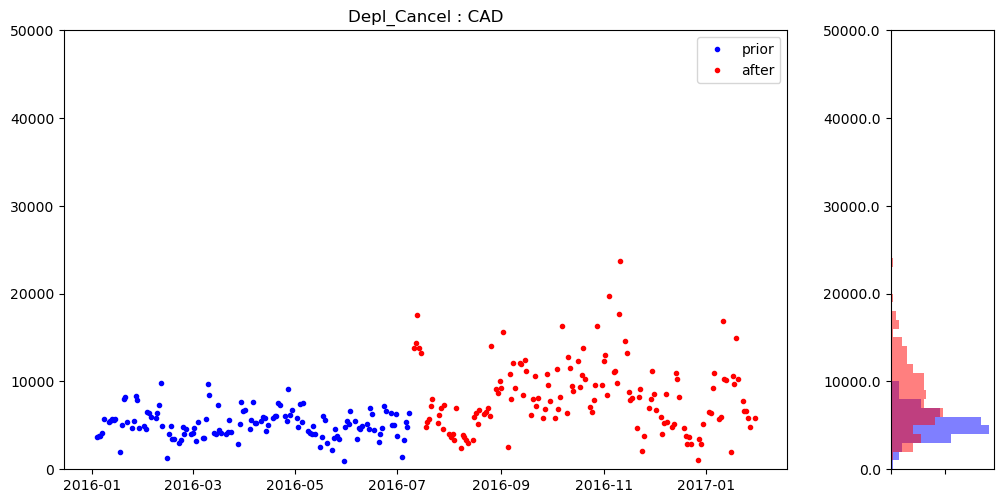

In [476]:
cme.time_series_hist_plot(ABSDEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, 0.0, 50000.0, 50)

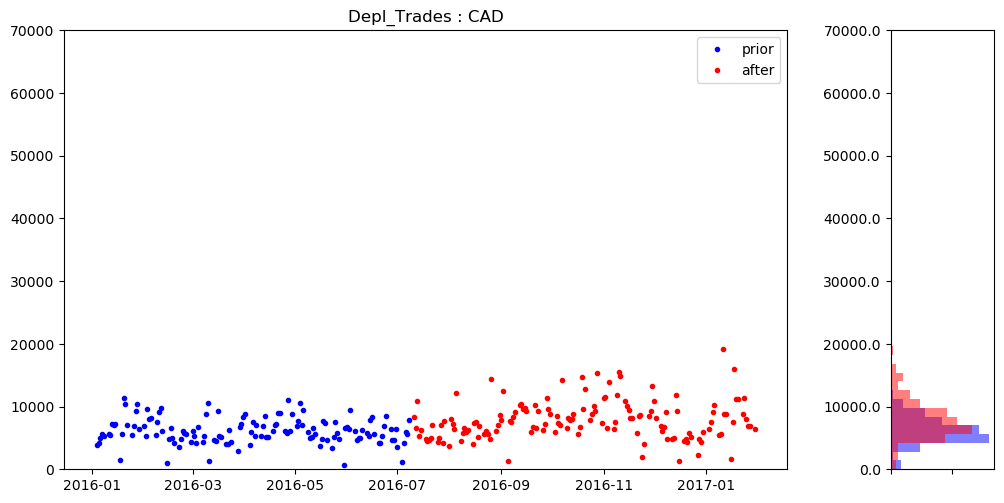

In [477]:
cme.time_series_hist_plot(ABSDEPL_STATS_TS, 'Depl_Trades',\
    'Depl_Trades : '+CURR, 0.0, 70000.0, 50)

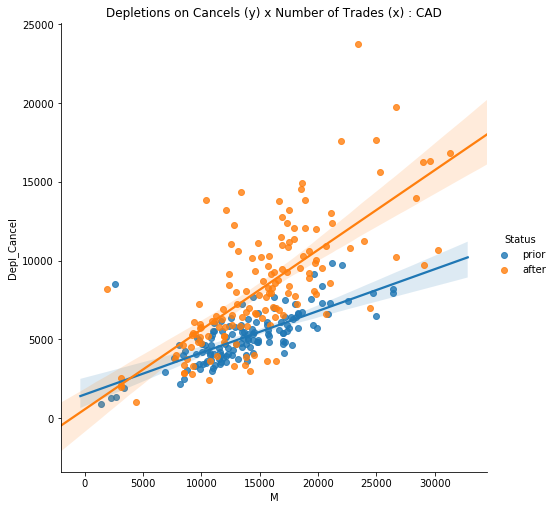

In [478]:
cme.regr_plot(ABSDEPL_STATS_TS, 'M', 'Depl_Cancel',\
    'Depletions on Cancels (y) x Number of Trades (x) : '+CURR)

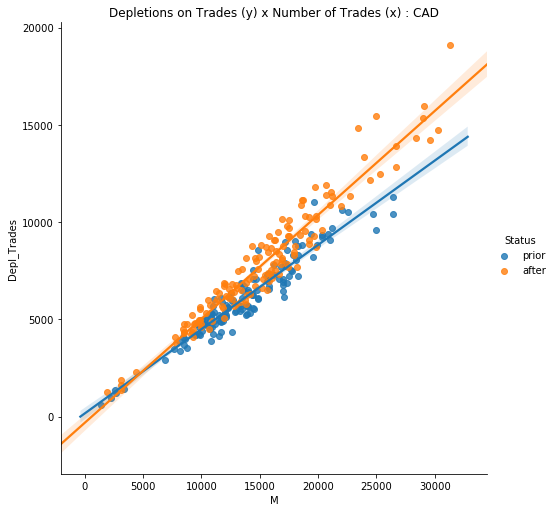

In [479]:
cme.regr_plot(ABSDEPL_STATS_TS, 'M', 'Depl_Trades',\
    'Depletions on Trades (y) x Number of Trades (x) : '+CURR)

In [480]:
cme.lin_reg(ABSDEPL_STATS_TS, ['M'], 'Depl_Cancel')

                            OLS Regression Results                            
Dep. Variable:            Depl_Cancel   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     229.5
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           3.81e-38
Time:                        15:05:53   Log-Likelihood:                -2572.6
No. Observations:                 278   AIC:                             5149.
Df Residuals:                     276   BIC:                             5156.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        220.5059    460.312      0.479      0.6

In [481]:
cme.lin_reg(ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     2276.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):          2.58e-135
Time:                        15:05:53   Log-Likelihood:                -2287.8
No. Observations:                 278   AIC:                             4580.
Df Residuals:                     276   BIC:                             4587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -401.6821    165.295     -2.430      0.0

In [482]:
cme.lin_reg(PRIOR_ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     1343.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           4.81e-71
Time:                        15:05:53   Log-Likelihood:                -1049.6
No. Observations:                 134   AIC:                             2103.
Df Residuals:                     132   BIC:                             2109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.2664    171.675      0.957      0.3

In [483]:
cme.lin_reg(AFTER_ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1823.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           6.61e-83
Time:                        15:05:53   Log-Likelihood:                -1171.1
No. Observations:                 144   AIC:                             2346.
Df Residuals:                     142   BIC:                             2352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -316.9926    203.863     -1.555      0.1

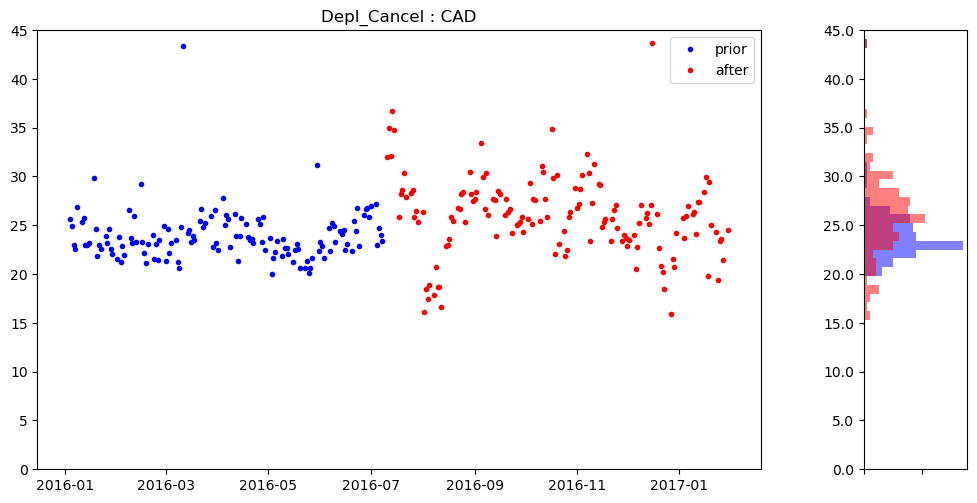

In [587]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, 0, 45, 50)

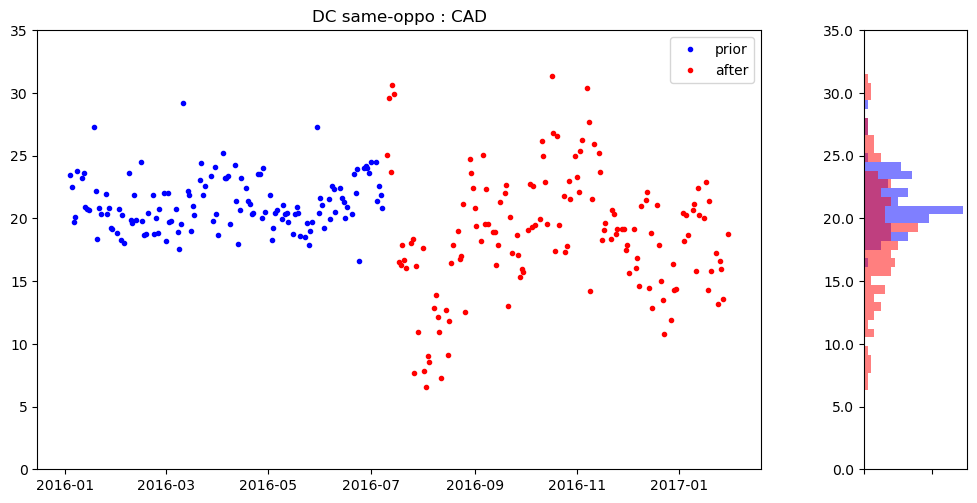

In [586]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DC same-oppo',\
    'DC same-oppo : '+CURR, 0, 35, 50)

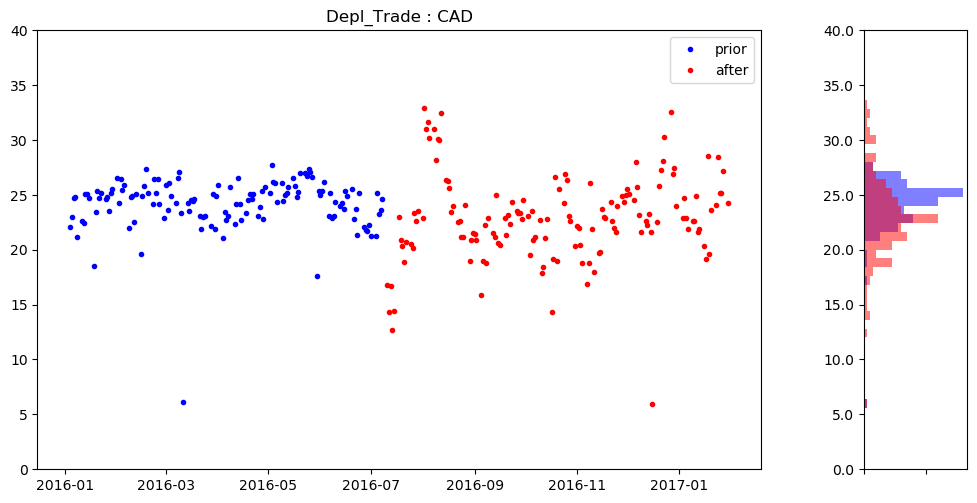

In [486]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Depl_Trade',\
    'Depl_Trade : '+CURR, 0, 40, 50)

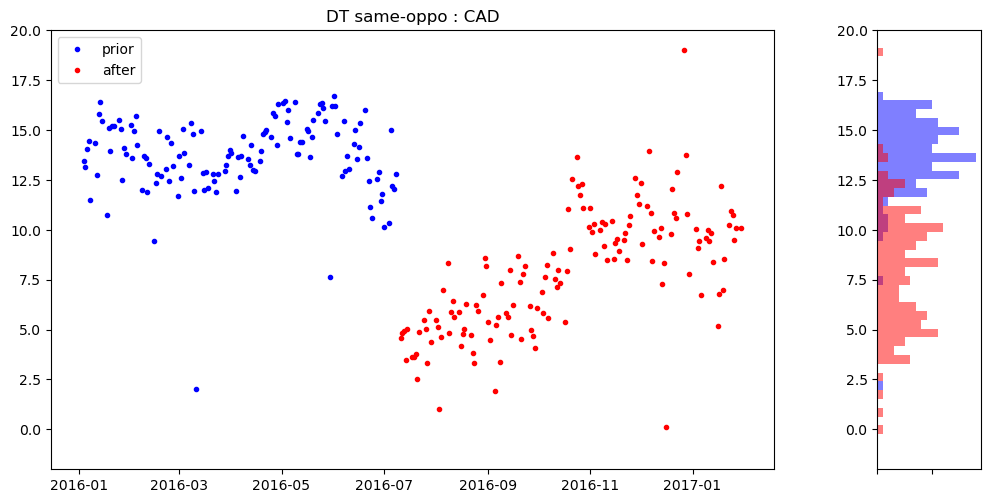

In [589]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DT same-oppo',\
    'DT same-oppo : '+CURR, -2, 20, 50)

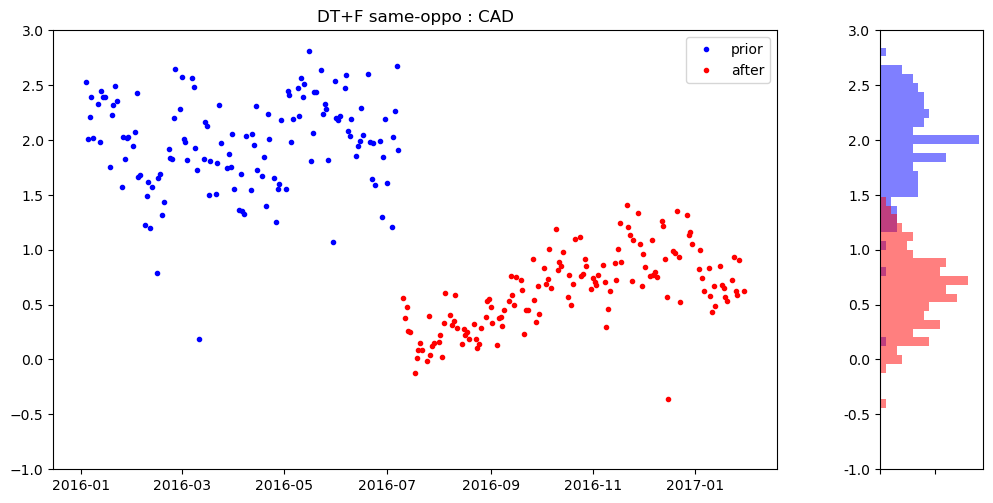

In [591]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DT+F same-oppo',\
    'DT+F same-oppo : '+CURR, -1, 3, 50)

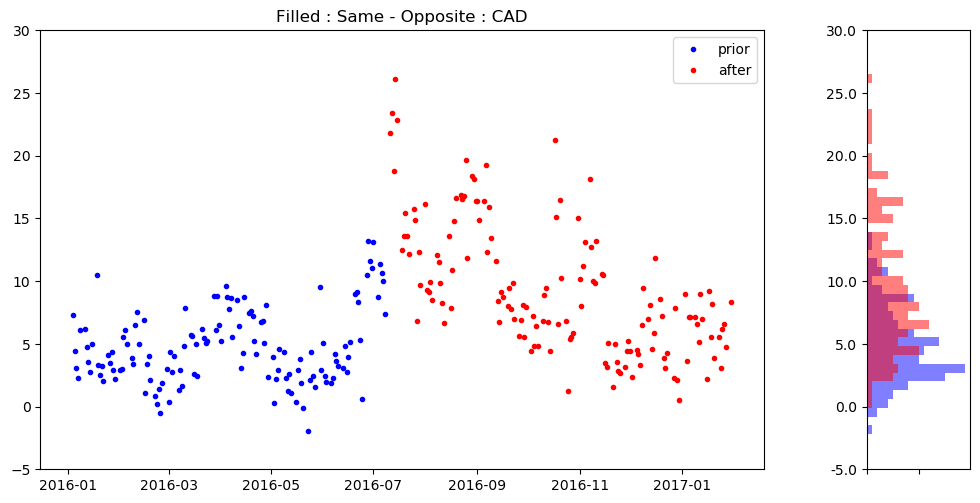

In [593]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Fill same-oppo',\
    'Filled : Same - Opposite : '+CURR, -5, 30, 50)

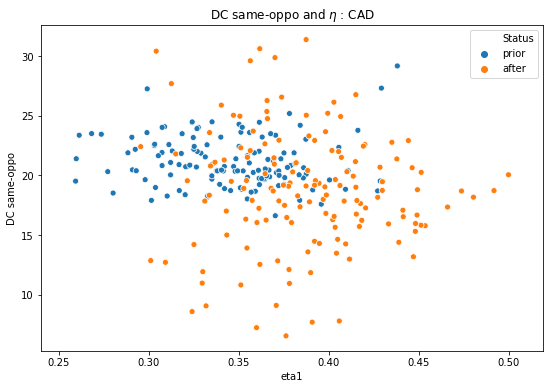

In [490]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DC same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DC same-oppo and $\eta$ : '+CURR);

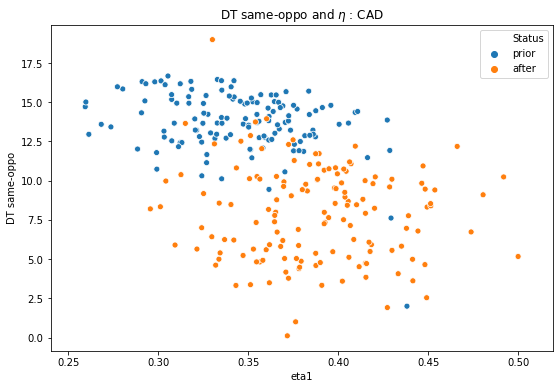

In [491]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT same-oppo and $\eta$ : '+CURR);

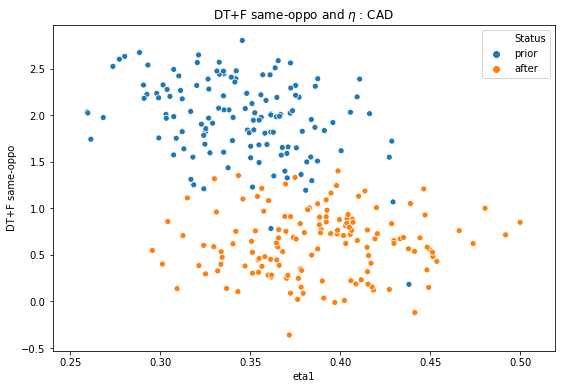

In [492]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT+F same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT+F same-oppo and $\eta$ : '+CURR);

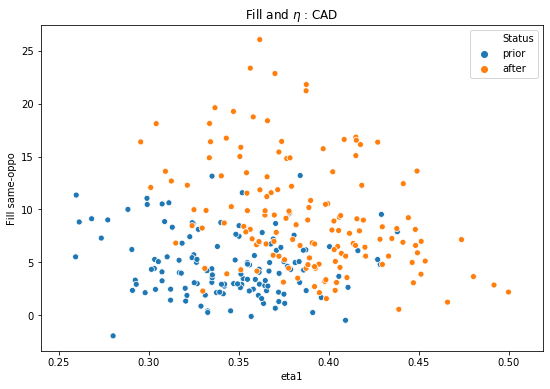

In [493]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Fill same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('Fill and $\eta$ : '+CURR);

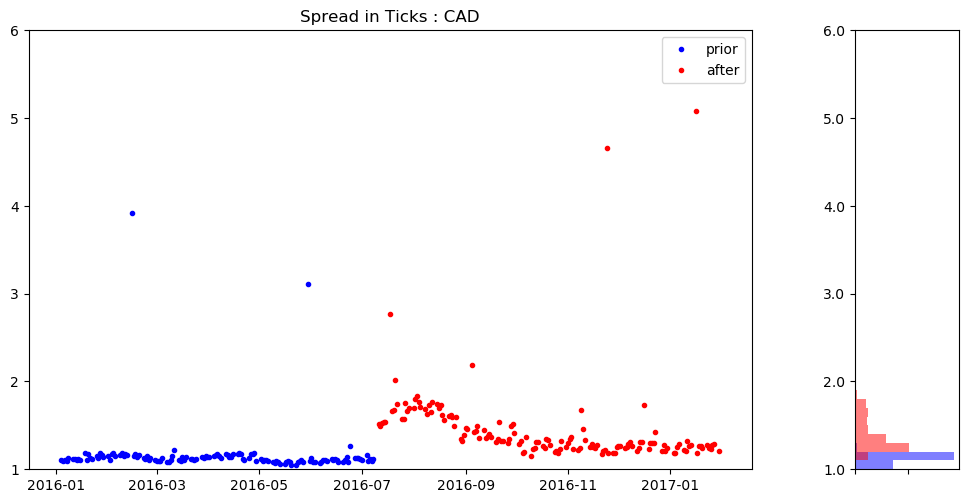

In [597]:
cme.time_series_hist_plot(OB_UZ_STATS, 'twspr1',\
    'Spread in Ticks : '+CURR, 1, 6, 50)

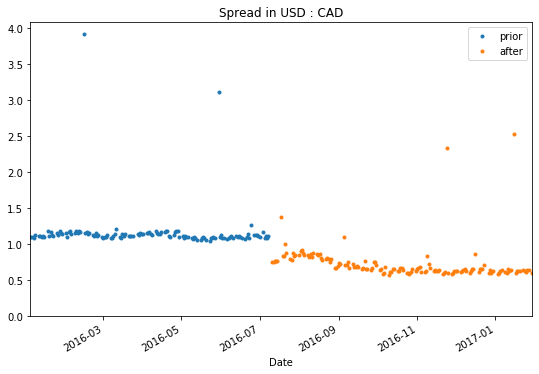

In [495]:
cme.twspr_plot_USD(OB_UZ_STATS, CURR)

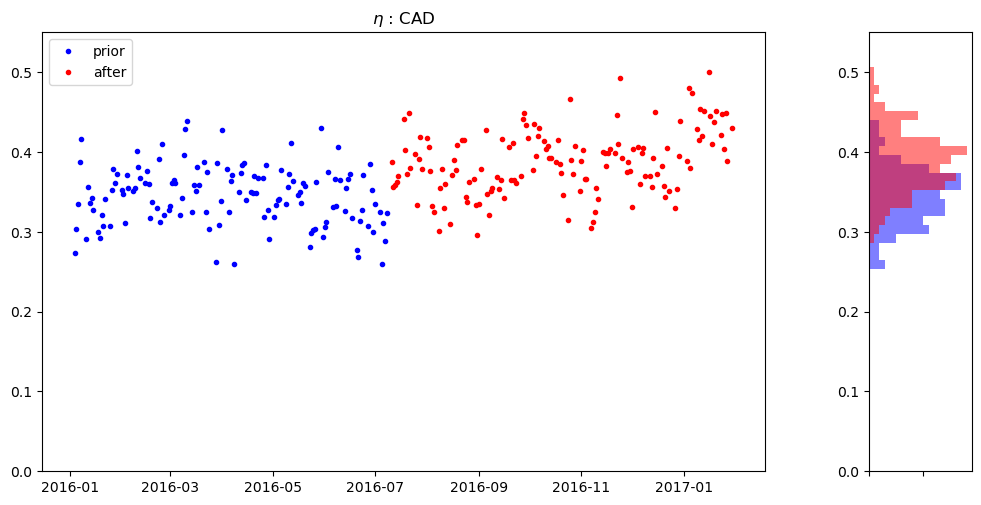

In [599]:
cme.time_series_hist_plot(OB_UZ_STATS, 'eta1',\
    '$\eta$ : '+CURR, 0, 0.55, 50)

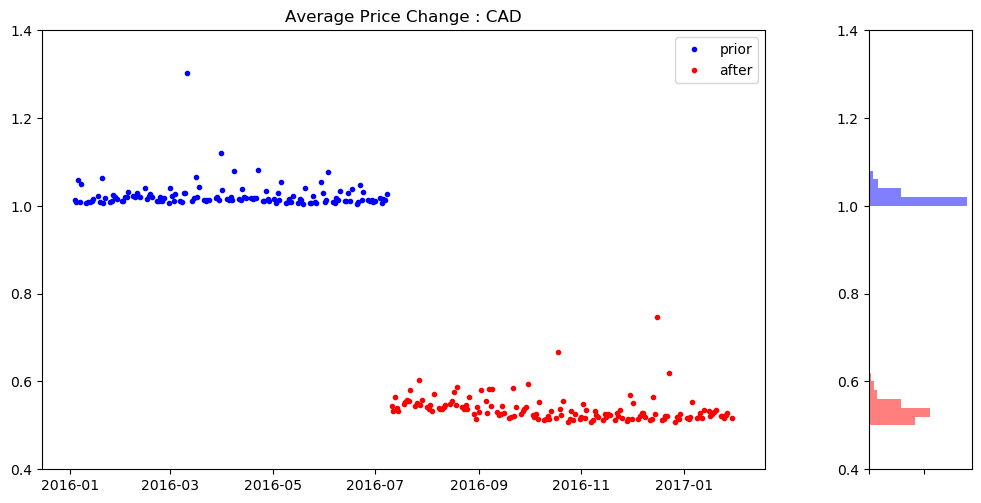

In [601]:
cme.time_series_hist_plot(OB_UZ_STATS, 'chgavg',\
    'Average Price Change : '+CURR, 0.4, 1.4, 50)

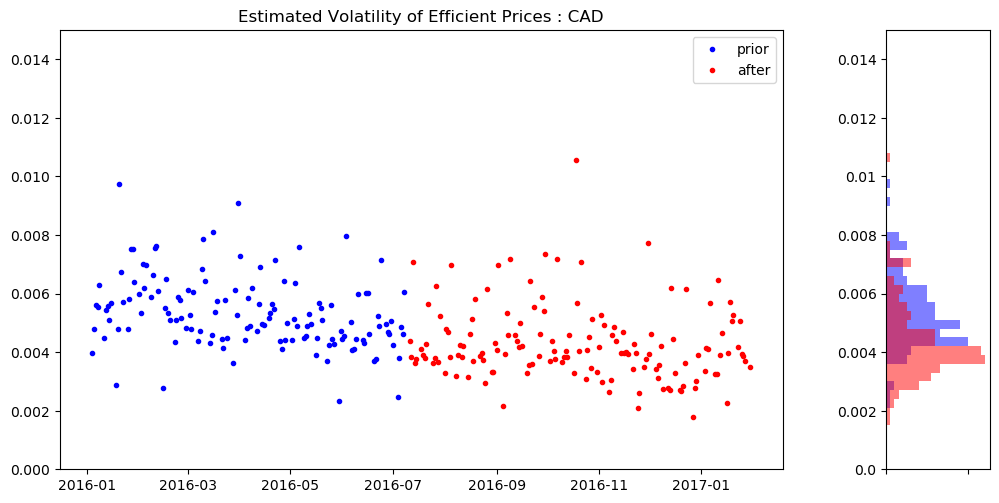

In [498]:
cme.time_series_hist_plot(OB_UZ_STATS, 'rvxe',\
    'Estimated Volatility of Efficient Prices : '+CURR, 0, 0.015, 50)

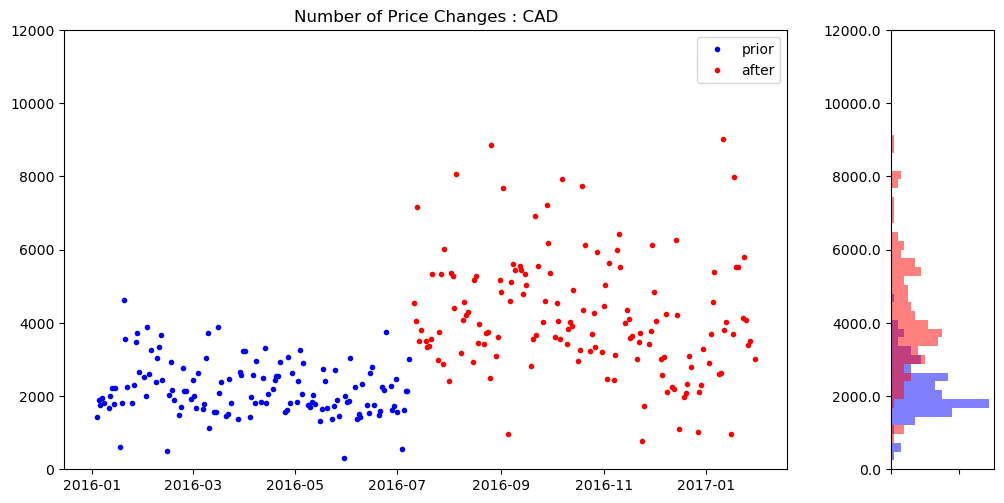

In [602]:
cme.time_series_hist_plot(OB_UZ_STATS, 'ndfpr',\
    'Number of Price Changes : '+CURR, 0, 12000, 50)

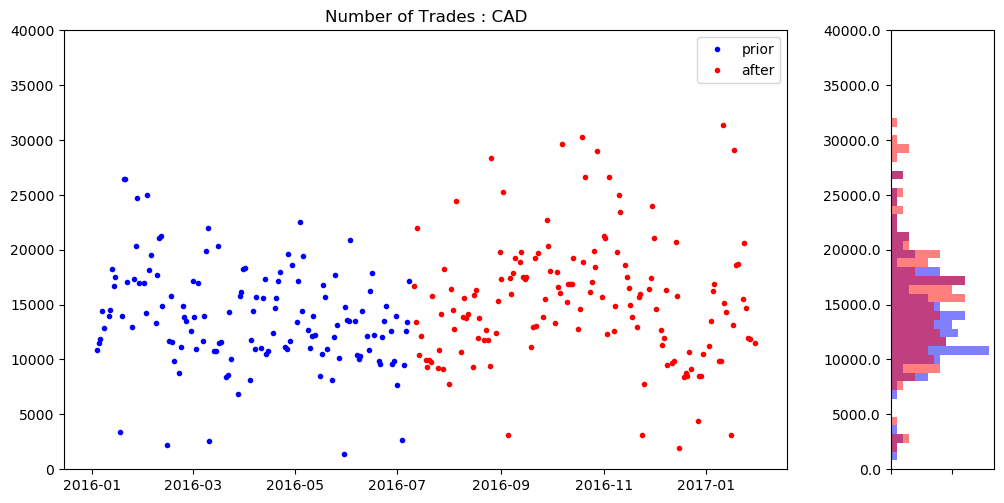

In [603]:
cme.time_series_hist_plot(OB_UZ_STATS, 'M',\
    'Number of Trades : '+CURR, 0, 40000, 50)

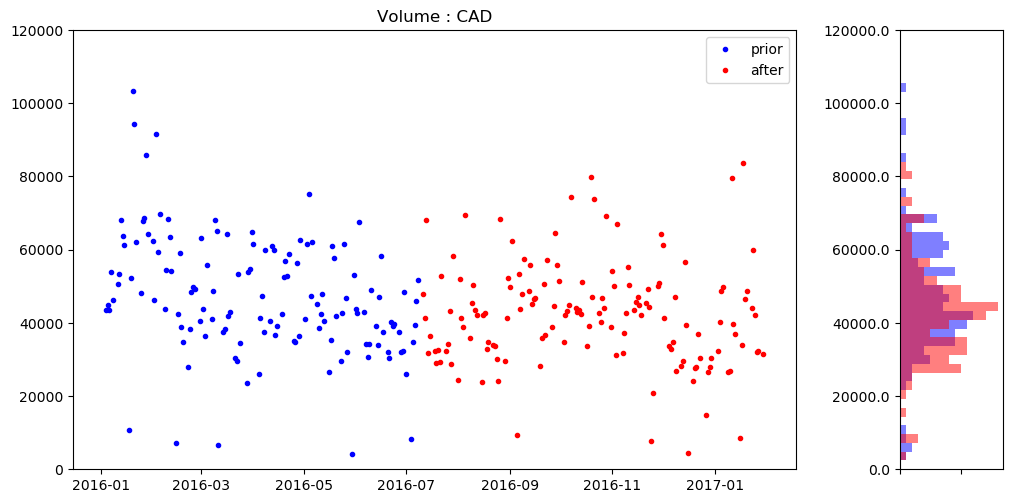

In [604]:
cme.time_series_hist_plot(OB_UZ_STATS, 'Volume',\
    'Volume : '+CURR, 0, 120000, 50)

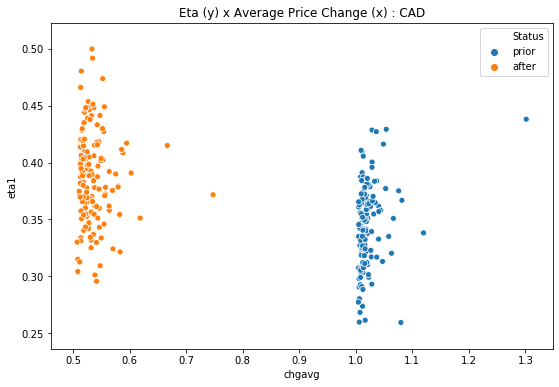

In [502]:
cme.scatter_plot(OB_UZ_STATS, 'chgavg', 'eta1',\
    'Eta (y) x Average Price Change (x) : '+CURR)

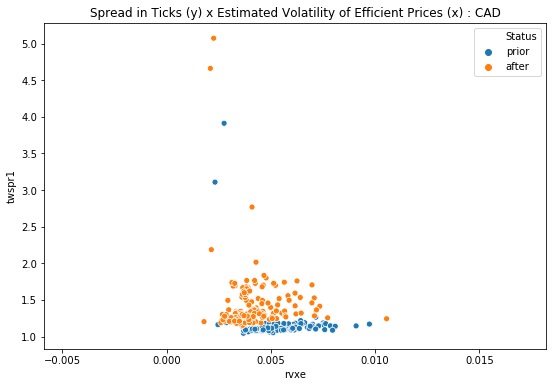

In [503]:
cme.scatter_plot(OB_UZ_STATS, 'rvxe', 'twspr1',\
    'Spread in Ticks (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

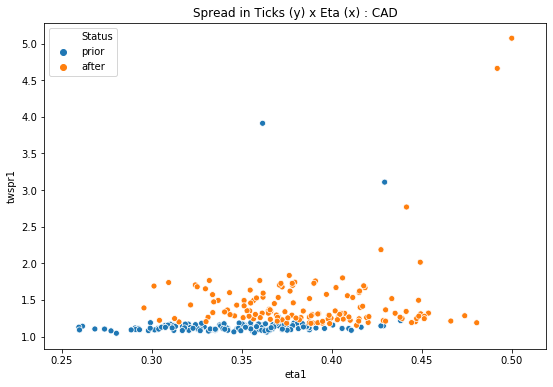

In [504]:
cme.scatter_plot(OB_UZ_STATS, 'eta1', 'twspr1',\
    'Spread in Ticks (y) x Eta (x) : '+CURR)

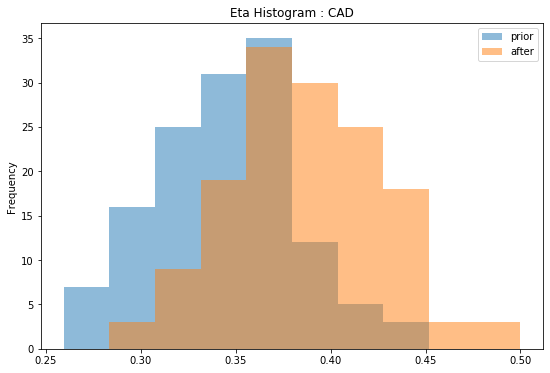

In [505]:
cme.time_series_hist(OB_UZ_STATS, 'eta1',\
    'Eta Histogram : '+CURR)

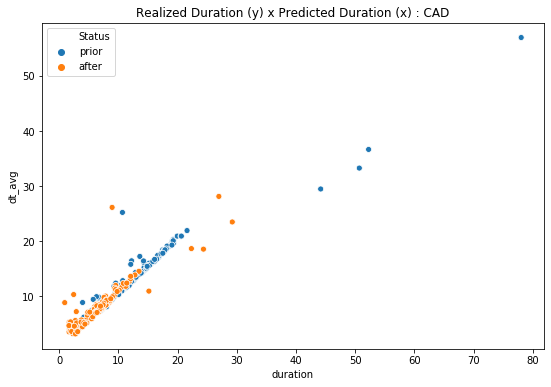

In [506]:
cme.scatter_plot(OB_UZ_STATS, 'duration', 'dt_avg',\
    'Realized Duration (y) x Predicted Duration (x) : '+CURR)

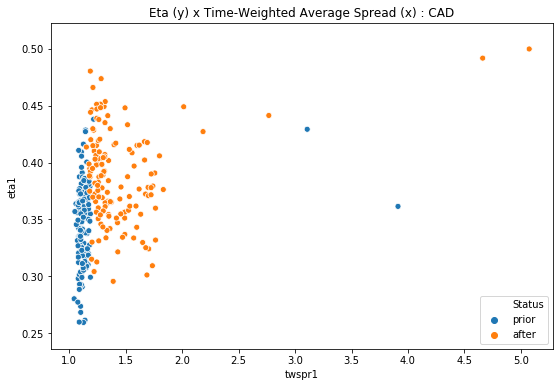

In [507]:
cme.scatter_plot(OB_UZ_STATS, 'twspr1', 'eta1',\
    'Eta (y) x Time-Weighted Average Spread (x) : '+CURR)

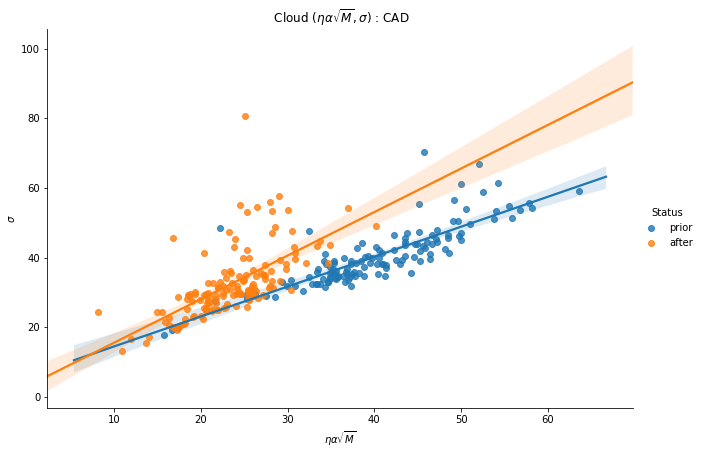

In [508]:
cme.cloud1(OB_UZ_STATS, CURR)

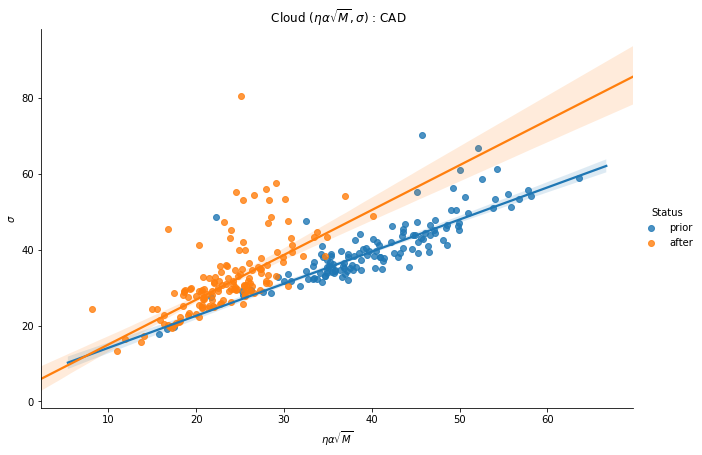

In [509]:
cme.cloud1(OB_UZ_STATS, CURR, True)

In [510]:
cme.lin_reg(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     165.6
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.38e-36
Time:                        15:06:12   Log-Likelihood:                -397.89
No. Observations:                 134   AIC:                             801.8
Df Residuals:                     131   BIC:                             810.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.6686      2.43

In [511]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                  134
Model:                            RLM   Df Residuals:                      131
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:06:12                                         
No. Iterations:                    22                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4615      1.49

In [512]:
cme.lin_reg(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     66.79
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           3.93e-21
Time:                        15:06:12   Log-Likelihood:                -483.79
No. Observations:                 144   AIC:                             973.6
Df Residuals:                     141   BIC:                             982.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.5672      3.20

In [513]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                  144
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:06:12                                         
No. Iterations:                    18                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.7997      1.33

In [514]:
OB_UZ_STATS['p1*eta*alpha*sqrt(M)'] = np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'])\
    *OB_UZ_STATS['eta*alpha*sqrt(M)']
OB_UZ_STATS['sigma-p2*S*sqrt(M)'] = OB_UZ_STATS['sigma']-\
    np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'])*\
    OB_UZ_STATS['S*sqrt(M)']

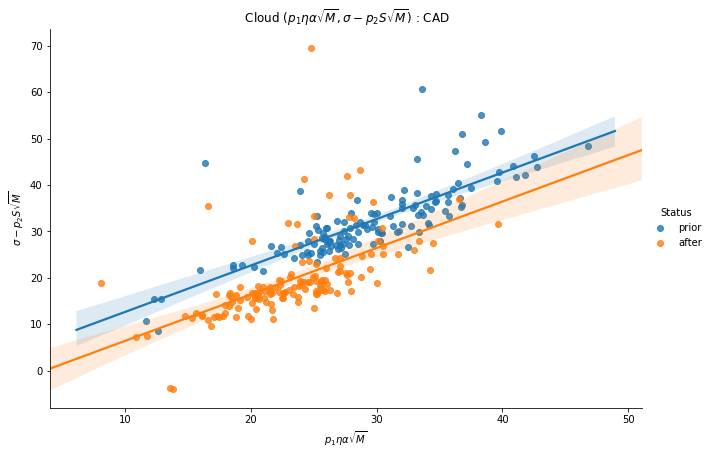

In [515]:
cme.cloud2(OB_UZ_STATS, CURR)

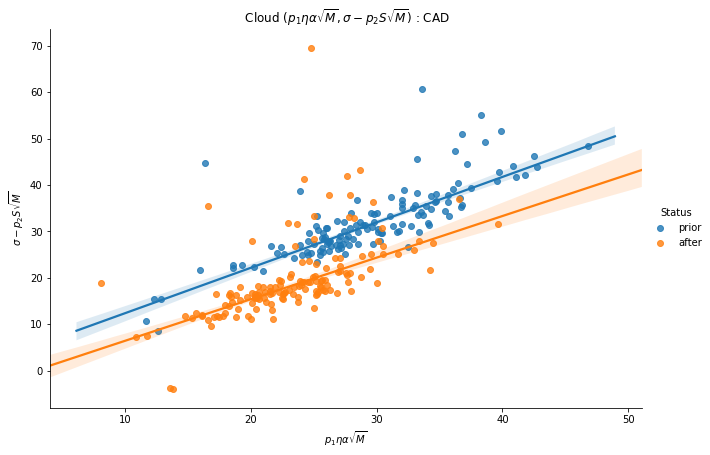

In [516]:
cme.cloud2(OB_UZ_STATS, CURR, True)

In [517]:
cme.lin_reg(OB_UZ_STATS[OB_UZ_STATS['Status']=='prior'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                            OLS Regression Results                            
Dep. Variable:     sigma-p2*S*sqrt(M)   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.55e-31
Time:                        15:06:24   Log-Likelihood:                -397.89
No. Observations:                 134   AIC:                             799.8
Df Residuals:                     132   BIC:                             805.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.6686 

In [518]:
cme.lin_reg_rob(OB_UZ_STATS[OB_UZ_STATS['Status']=='prior'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                    Robust linear Model Regression Results                    
Dep. Variable:     sigma-p2*S*sqrt(M)   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:06:24                                         
No. Iterations:                    13                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.6278 

In [519]:
cme.lin_reg(OB_UZ_STATS[OB_UZ_STATS['Status']=='after'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                            OLS Regression Results                            
Dep. Variable:     sigma-p2*S*sqrt(M)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     72.62
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           2.08e-14
Time:                        15:06:24   Log-Likelihood:                -483.79
No. Observations:                 144   AIC:                             971.6
Df Residuals:                     142   BIC:                             977.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.5672 

In [520]:
cme.lin_reg_rob(OB_UZ_STATS[OB_UZ_STATS['Status']=='after'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                    Robust linear Model Regression Results                    
Dep. Variable:     sigma-p2*S*sqrt(M)   No. Observations:                  144
Model:                            RLM   Df Residuals:                      142
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:06:24                                         
No. Iterations:                    17                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.4930 

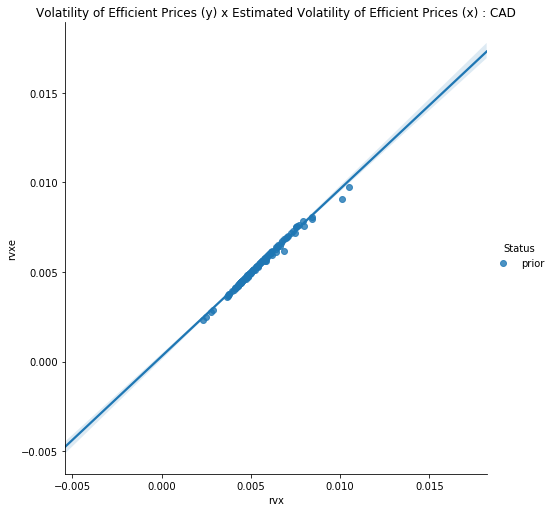

In [521]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'rvx', 'rvxe',\
    'Volatility of Efficient Prices (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

In [522]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvx', 'rvxe', True)

                            OLS Regression Results                            
Dep. Variable:                   rvxe   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.364e+04
Date:                Wed, 09 Oct 2019   Prob (F-statistic):          8.23e-161
Time:                        15:06:24   Log-Likelihood:                 378.28
No. Observations:                 134   AIC:                            -752.6
Df Residuals:                     132   BIC:                            -746.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1838      0.028     -6.638      0.0

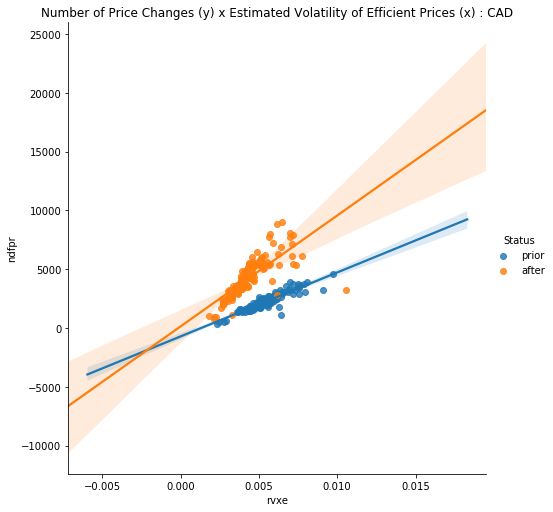

In [523]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

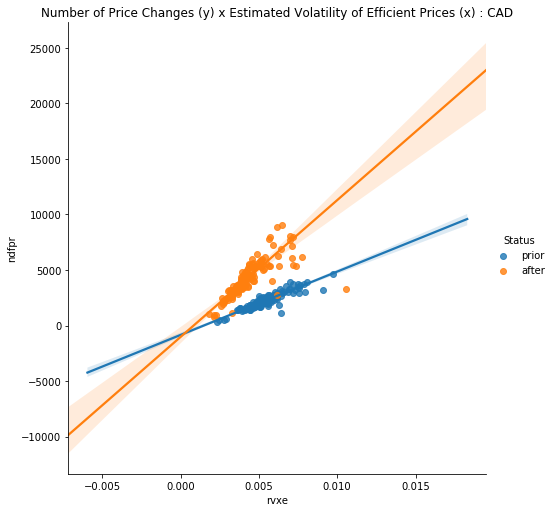

In [524]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR, True)

In [525]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     621.3
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           9.12e-52
Time:                        15:06:32   Log-Likelihood:                 55.535
No. Observations:                 134   AIC:                            -107.1
Df Residuals:                     132   BIC:                            -101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5556      0.318     48.856      0.0

In [526]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:06:32                                         
No. Iterations:                    20                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1708      0.236     64.242      0.0

In [527]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     327.4
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.08e-38
Time:                        15:06:32   Log-Likelihood:                 5.9724
No. Observations:                 144   AIC:                            -7.945
Df Residuals:                     142   BIC:                            -2.005
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2354      0.386     39.450      0.0

In [528]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  144
Model:                            RLM   Df Residuals:                      142
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:06:32                                         
No. Iterations:                    23                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.7933      0.250     63.074      0.0

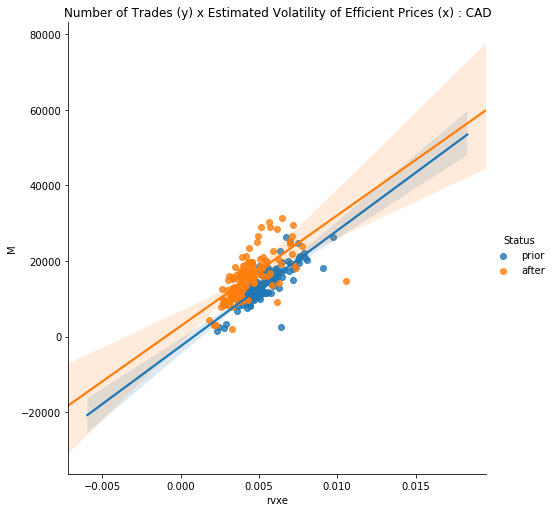

In [529]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

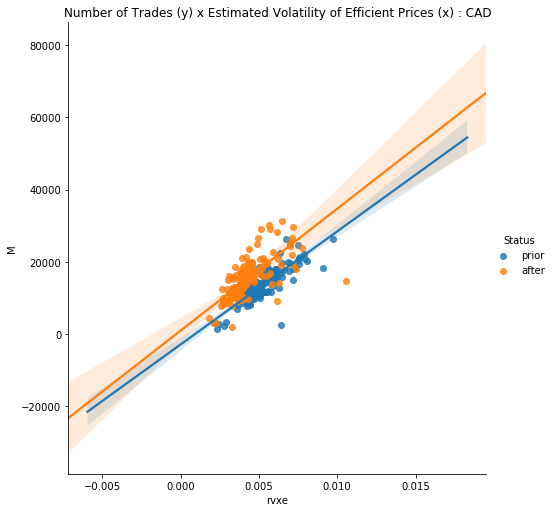

In [530]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR, True)

In [531]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     226.3
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           2.09e-30
Time:                        15:06:38   Log-Likelihood:                -10.960
No. Observations:                 134   AIC:                             25.92
Df Residuals:                     132   BIC:                             31.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3197      0.523     33.118      0.0

In [532]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:06:38                                         
No. Iterations:                    32                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3148      0.325     50.173      0.0

In [533]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           4.23e-24
Time:                        15:06:38   Log-Likelihood:                -30.302
No. Observations:                 144   AIC:                             64.60
Df Residuals:                     142   BIC:                             70.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6581      0.497     31.516      0.0

In [534]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  144
Model:                            RLM   Df Residuals:                      142
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:06:38                                         
No. Iterations:                    21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5334      0.386     40.241      0.0

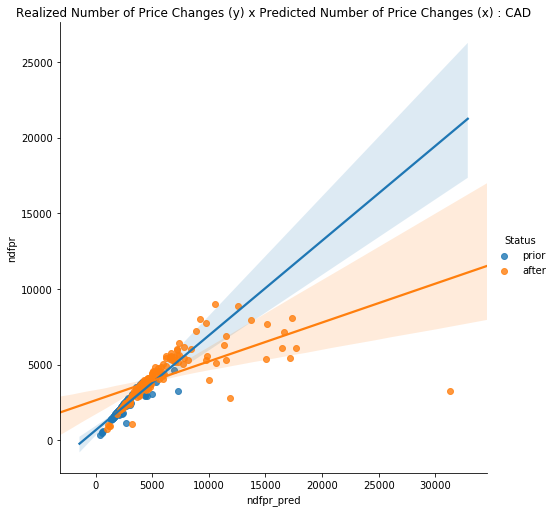

In [535]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR)

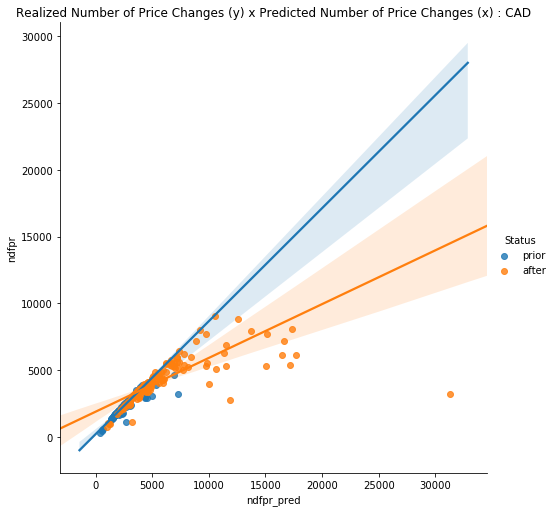

In [536]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR, True)

In [537]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     559.5
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           2.63e-49
Time:                        15:06:52   Log-Likelihood:                -961.76
No. Observations:                 134   AIC:                             1928.
Df Residuals:                     132   BIC:                             1933.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        657.9355     70.241      9.367      0.0

In [538]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:06:52                                         
No. Iterations:                    30                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        215.0019     18.438     11.661      0.0

In [539]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     108.7
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           3.00e-19
Time:                        15:06:52   Log-Likelihood:                -1222.9
No. Observations:                 144   AIC:                             2450.
Df Residuals:                     142   BIC:                             2456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2639.7083    176.829     14.928      0.0

In [540]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  144
Model:                            RLM   Df Residuals:                      142
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:06:52                                         
No. Iterations:                    24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1897.5304    100.877     18.810      0.0

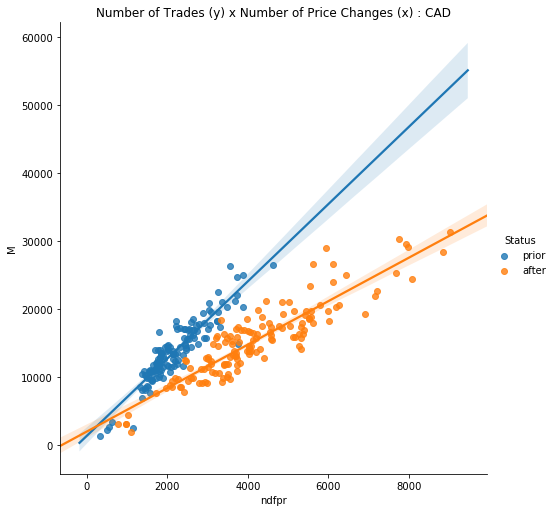

In [541]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR)

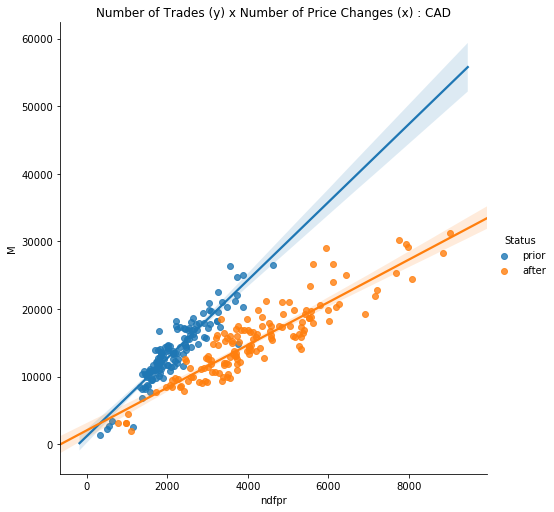

In [542]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

In [545]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     691.3
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           2.57e-54
Time:                        15:07:03   Log-Likelihood:                -1194.5
No. Observations:                 134   AIC:                             2393.
Df Residuals:                     132   BIC:                             2399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1394.3960    497.248      2.804      0.0

In [546]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:07:03                                         
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1208.9692    450.252      2.685      0.0

In [547]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     657.4
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           3.84e-55
Time:                        15:07:03   Log-Likelihood:                -1320.7
No. Observations:                 144   AIC:                             2645.
Df Residuals:                     142   BIC:                             2651.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2011.9887    554.650      3.627      0.0

In [548]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  144
Model:                            RLM   Df Residuals:                      142
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:07:03                                         
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2055.0456    563.346      3.648      0.0

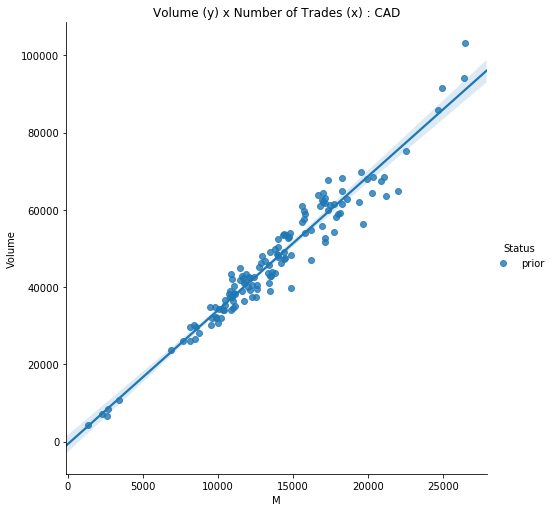

In [549]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR)

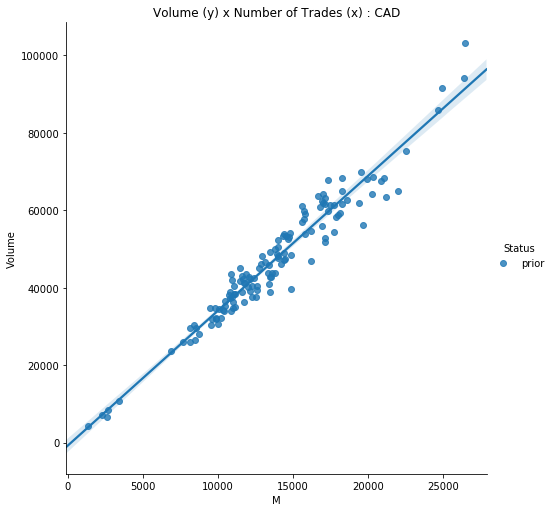

In [550]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR, True)

In [551]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2136.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           2.21e-83
Time:                        15:07:06   Log-Likelihood:                -1297.1
No. Observations:                 134   AIC:                             2598.
Df Residuals:                     132   BIC:                             2604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -598.8128   1088.045     -0.550      0.5

In [552]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                    Robust linear Model Regression Results                    
Dep. Variable:                 Volume   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:07:06                                         
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -706.6667   1017.503     -0.695      0.4

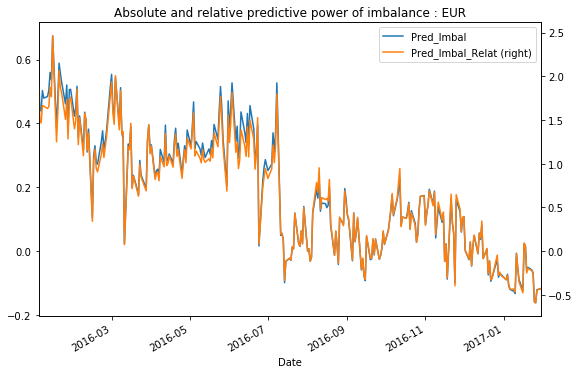

In [553]:
IMBAL_STATS_TS.drop(columns=['eta1']).plot(secondary_y=['Pred_Imbal_Relat'],\
    figsize=(9,6), title='Absolute and relative predictive power of imbalance : EUR');

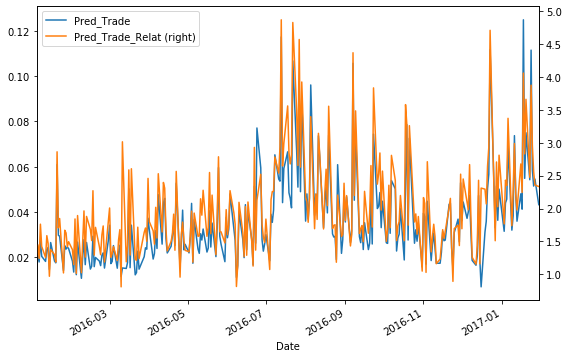

In [554]:
TRADE_STATS_TS.plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

In [555]:
OB_UZ_STATS_SPREADS = cme.spread_stats(OB_UZ_STATS)

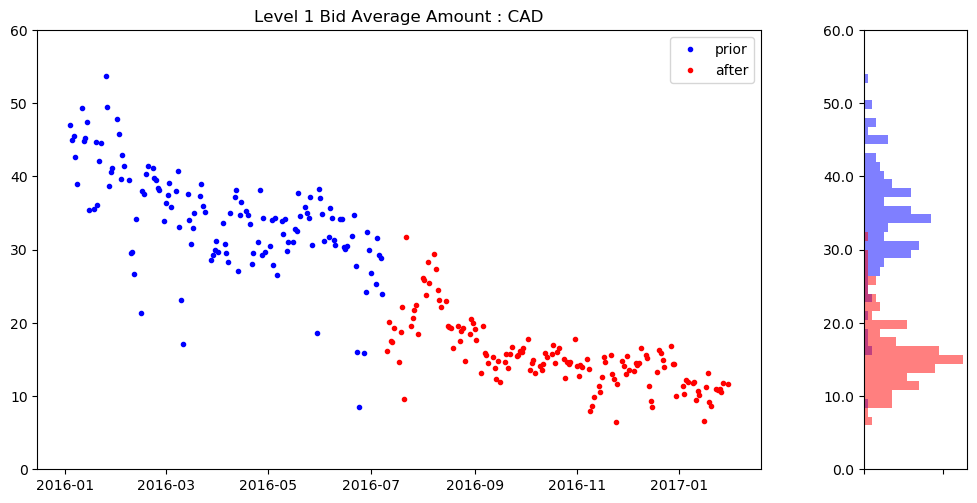

In [605]:
cme.time_series_hist_plot(OB_UZ_STATS_SPREADS, 'bid1qty',\
    'Level 1 Bid Average Amount : '+CURR, 0, 60, 50)

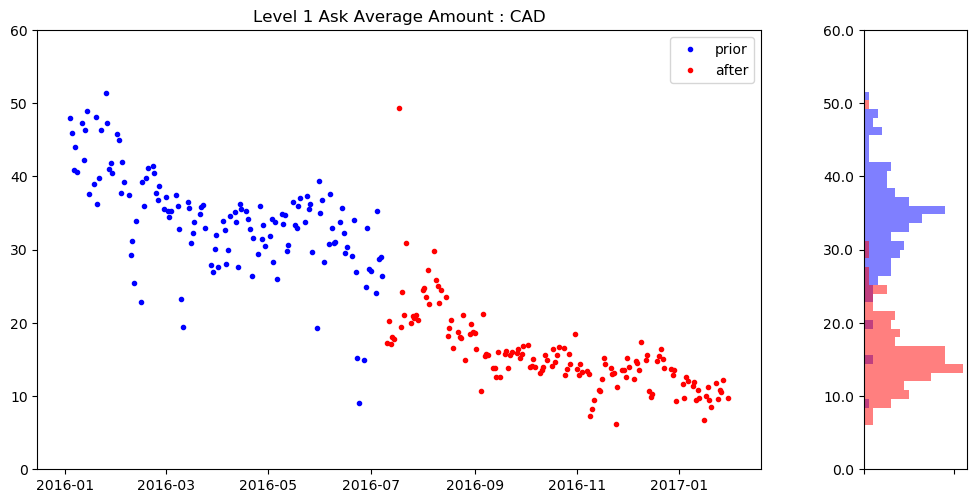

In [606]:
cme.time_series_hist_plot(OB_UZ_STATS_SPREADS, 'ask1qty',\
    'Level 1 Ask Average Amount : '+CURR, 0, 60, 50)

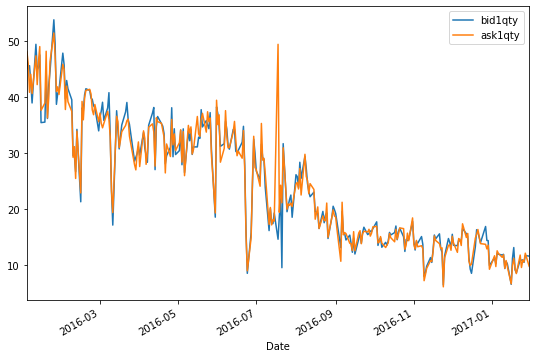

In [558]:
OB_UZ_STATS_SPREADS[['bid1qty', 'ask1qty']].plot(figsize=(9,6));

In [559]:
OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'prior'][['bid1qty', 'ask1qty']].mean()/\
    OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'after'][['bid1qty', 'ask1qty']].mean()

bid1qty    2.215393
ask1qty    2.182991
dtype: float64

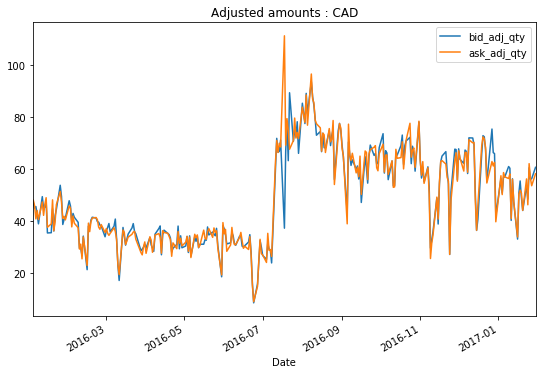

In [560]:
OB_UZ_STATS_SPREADS[['bid_adj_qty', 'ask_adj_qty']].plot(figsize=(9,6),\
    title='Adjusted amounts : '+CURR);

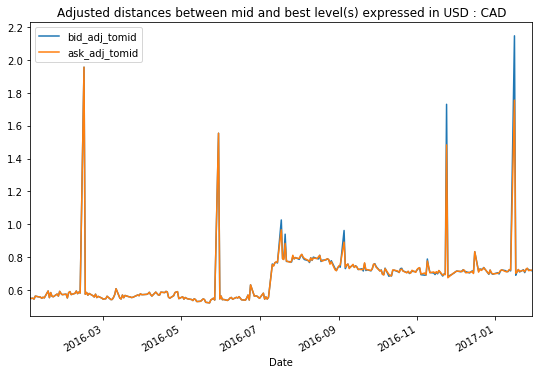

In [561]:
OB_UZ_STATS_SPREADS[['bid_adj_tomid', 'ask_adj_tomid']].plot(figsize=(9,6),\
    title='Adjusted distances between mid and best level(s) expressed in USD : '+CURR);

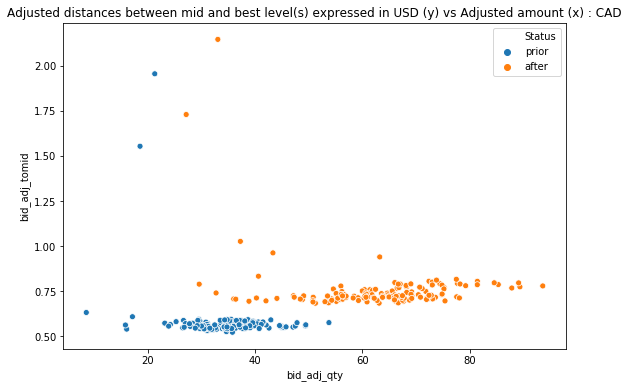

In [562]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='bid_adj_qty', y='bid_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);
plt.title('Adjusted distances between mid and best level(s) expressed in USD (y) vs Adjusted amount (x) : '+CURR);

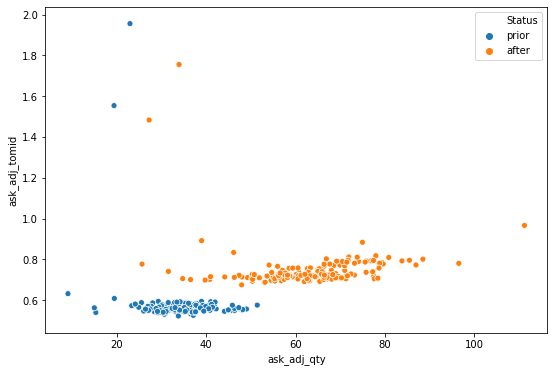

In [563]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='ask_adj_qty', y='ask_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);

### Costs

In [564]:
PRIOR_MEAN_COST = cme.cost_mean(PRIOR_COST_STATS, 100)

In [565]:
PRIOR_MEAN_COST['Status'] = 'prior'

In [566]:
AFTER_MEAN_COST = cme.cost_mean(AFTER_COST_STATS, 100)

In [567]:
AFTER_MEAN_COST['Status'] = 'after'

In [568]:
MEAN_COST_STATS = pd.concat([PRIOR_MEAN_COST, AFTER_MEAN_COST], sort=False)

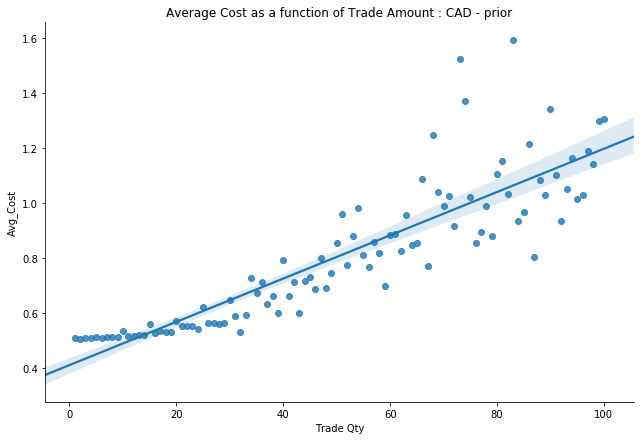

In [569]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

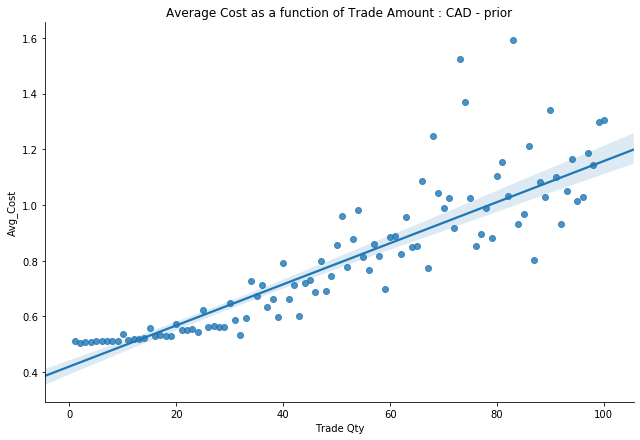

In [570]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5, robust=True);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

In [571]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     144.5
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           4.37e-16
Time:                        15:07:16   Log-Likelihood:                 83.666
No. Observations:                  50   AIC:                            -163.3
Df Residuals:                      48   BIC:                            -159.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4591      0.013     34.507      0.0

In [572]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:07:16                                         
No. Iterations:                    10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4641      0.012     40.135      0.0

In [573]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     329.1
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           4.33e-33
Time:                        15:07:16   Log-Likelihood:                 67.028
No. Observations:                 100   AIC:                            -130.1
Df Residuals:                      98   BIC:                            -124.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4114      0.025     16.327      0.0

In [574]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:07:16                                         
No. Iterations:                    26                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4203      0.018     23.545      0.0

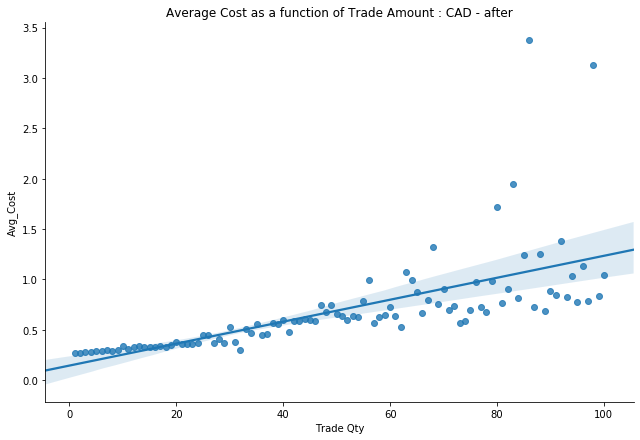

In [575]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

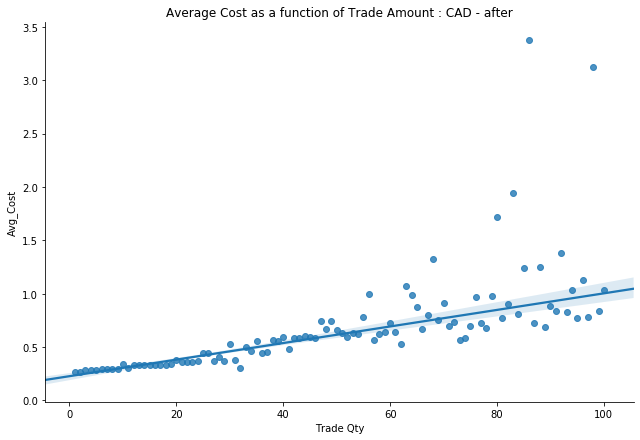

In [576]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5, robust=True);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

In [577]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     243.6
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.96e-20
Time:                        15:07:26   Log-Likelihood:                 75.407
No. Observations:                  50   AIC:                            -146.8
Df Residuals:                      48   BIC:                            -143.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2134      0.016     13.601      0.0

In [578]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:07:26                                         
No. Iterations:                    18                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2193      0.014     15.233      0.0

In [579]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     74.20
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.22e-13
Time:                        15:07:26   Log-Likelihood:                -40.198
No. Observations:                 100   AIC:                             84.40
Df Residuals:                      98   BIC:                             89.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1439      0.074      1.955      0.0

In [580]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        15:07:26                                         
No. Iterations:                    26                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2274      0.021     10.797      0.0

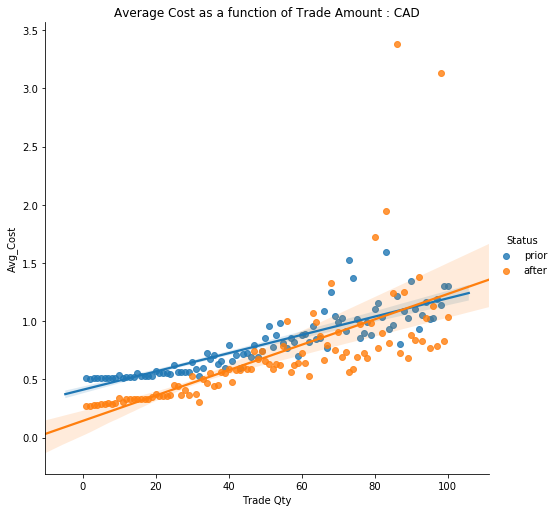

In [581]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR)

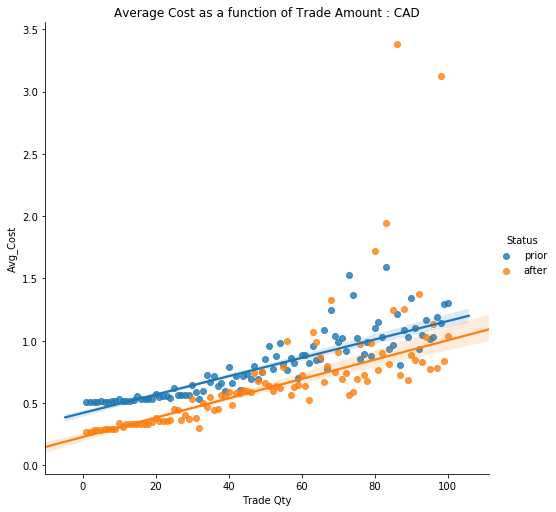

In [582]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR, True)

## Eta prediction

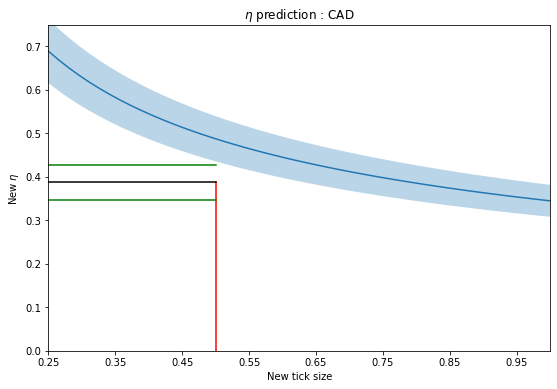

In [583]:
cme.plot_eta(TICK_PRIOR, TICK_AFTER,\
    TABLE_MATHIEU.loc['prior']['eta1'], TABLE_MATHIEU.loc['after']['eta1'],\
    TABLE_MATHIEU_ERR.loc['prior']['eta1'], TABLE_MATHIEU_ERR.loc['after']['eta1'],\
    CURR)